In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [30]:
cat = ['Alpha', 'Beta', 'Gamma', 'Delta']
df = pd.DataFrame({'cat_var': np.random.choice(cat, 200, p=[0.2, 0.4, 0.1, 0.3])})
df.head()

,cat_var
0,Beta
1,Beta
2,Beta
3,Beta
4,Beta


In [31]:
df['cat_var'].value_counts()

Beta     93
Delta    55
Alpha    35
Gamma    17
Name: cat_var, dtype: int64

In [46]:
def percentages_block(df, var):
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int)
    decimal = (percentages - counts).sort_values(ascending=False)

    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

(-0.8900000000000001, 9.89, 0.0, 10.780000000000001)

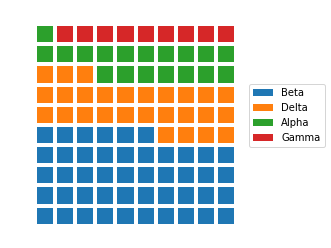

In [76]:
waffle_counts = percentages_block(df, 'cat_var')

prev_count = 0
for cat in range(waffle_counts.shape[0]):
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    
    x = blocks % 10
    y = blocks // 10
    plt.bar(x=x, height=0.8, width=0.8, bottom=y)
    prev_count += waffle_counts[cat]
    
plt.legend(waffle_counts.index, bbox_to_anchor=(1, 0.5), loc=6)
plt.axis('off')
plt.axis('square')